## Imports

In [1]:
import xtrack as xt
import ruamel.yaml
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import xdeps as xd

# Initialize yaml reader
ryaml = ruamel.yaml.YAML()


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

## Load collider and elements

In [2]:
collider = xt.Multiline.from_json(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/collider/collider.json"
)

# Don't build trackers yet as it will be done after dynamic closing knob is created
#collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
# load dictionnary of elements from pickle
with open(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/gen_3/dynamic_configure.pkl",
    "rb",
) as fid:
    dic_elements = pickle.load(fid)

In [4]:
l_xrange = []
d_element_attr_vals = { 'lhcb1': {}, 'lhcb2': {}}
for on_sep, d_beam in sorted(dic_elements.items()):
    l_xrange.append(on_sep)
    for beam_temp, d_bb in d_beam.items():
        for type_bb, d_elements in d_bb.items():
            for element, d_attr in d_elements.items():
                if element not in d_element_attr_vals[beam_temp]:
                    d_element_attr_vals[beam_temp][element] = {}

                for attr, val in d_attr.items():
                    if attr in d_element_attr_vals[beam_temp][element]:
                        d_element_attr_vals[beam_temp][element][attr].append(val)
                    else:
                        d_element_attr_vals[beam_temp][element][attr] = [val]
                        
# Ensure all the element attribue values are stored in lists
for beam_temp, d_bb in d_element_attr_vals.items():
    for element, d_attr in d_bb.items():
        for attr, val in d_attr.items():
            d_element_attr_vals[beam_temp][element][attr] = list(np.squeeze(np.array(val)))

In [5]:
d_element_attr_vals["lhcb1"]["bb_lr.l5b1_25"]["other_beam_shift_y"]

[-0.0010210880370609145,
 -0.0006882542207094816,
 -0.0004547170129970918,
 -0.000300403814904707,
 -0.00019859658182067646,
 -0.0001317568963989628,
 -8.818979536639974e-05,
 -6.011460465246441e-05,
 -4.244180063827457e-05,
 -3.158032909361299e-05,
 -2.1773984303972045e-05,
 -1.0344774690498794e-05,
 -3.0929832258297944e-06,
 -5.664707557619212e-07,
 -1.1997912956841079e-07,
 -2.481844380082458e-07,
 -4.6246853768964446e-07,
 -6.423679609019895e-07,
 -7.723968818363726e-07,
 -8.615260174040459e-07,
 -9.213219022654885e-07,
 -9.610717652716225e-07,
 -9.87388889241443e-07,
 -1.0047809242901894e-06,
 -1.0162654086194354e-06,
 -1.0238452845523908e-06,
 -1.0288476009464912e-06,
 -1.03214823745177e-06,
 -1.0343262092116215e-06,
 -1.0357632125493043e-06,
 -1.0367114114830986e-06,
 -1.0373369504237973e-06,
 -1.037749492779772e-06,
 -1.0380218638378245e-06,
 -1.038201476207202e-06,
 -1.038320068807551e-06,
 -1.0383982206995679e-06,
 -1.0384500719132293e-06,
 -1.038484026435589e-06,
 -1.0385062

In [6]:
l_xrange

[-1.0,
 -0.6597715439978032,
 -0.43529849026924516,
 -0.2871975570248526,
 -0.18948477563068414,
 -0.12501666298193378,
 -0.08248243676104346,
 -0.054419564654534805,
 -0.035904480195810703,
 -0.023688754335228577,
 -0.01562916602313841,
 -0.010311678998484036,
 -0.006803352374039533,
 -0.004488658300181182,
 -0.0029614890171890938,
 -0.001953906181403385,
 -0.001289131698131363,
 -0.0008505324108926394,
 -0.0005611570819548106,
 -0.0003702354743866272,
 -0.0002442708305788242,
 -0.0001611629430446166,
 -0.00010633072376777673,
 -7.015398579466997e-05,
 -4.6285603525349354e-05,
 -3.0537924102789905e-05,
 -2.0148053335785425e-05,
 -1.3293112257901239e-05,
 -8.770417198931623e-06,
 -5.786471696844006e-06,
 -3.817749365726358e-06,
 -2.518842393621913e-06,
 -1.661860535127052e-06,
 -1.0964482911697921e-06,
 -7.234053819788456e-07,
 -4.772822858045029e-07,
 -3.148972706280381e-07,
 -2.0776025844295507e-07,
 -1.370743064942909e-07,
 -9.043772683816628e-08,
 -0.0]

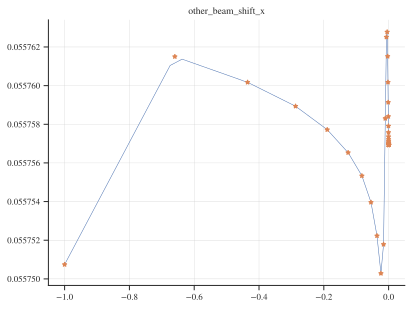

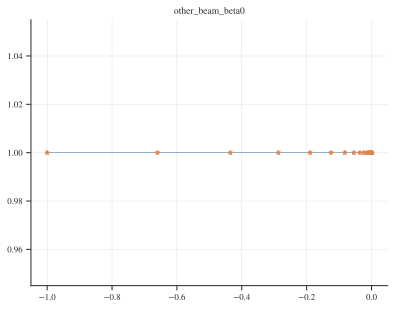

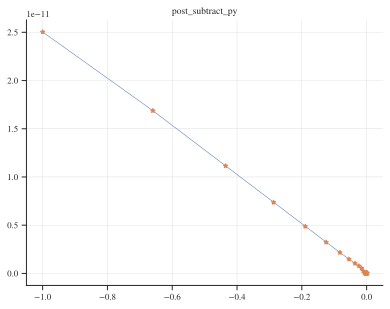

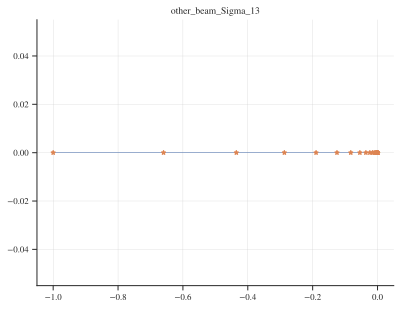

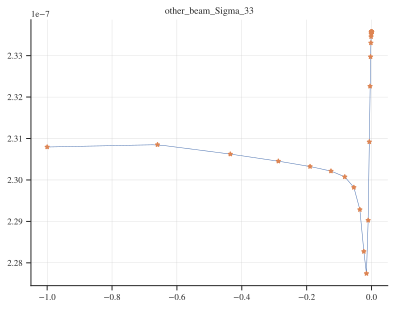

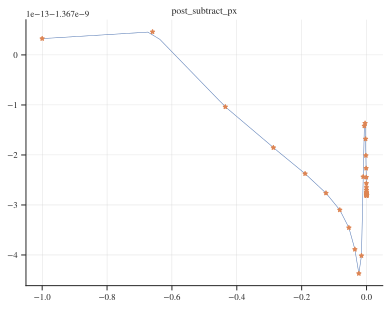

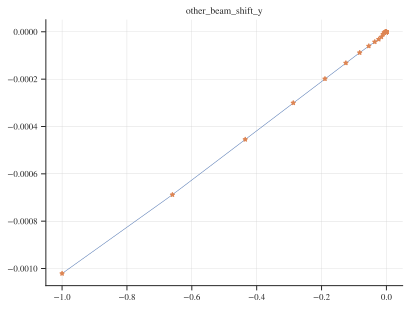

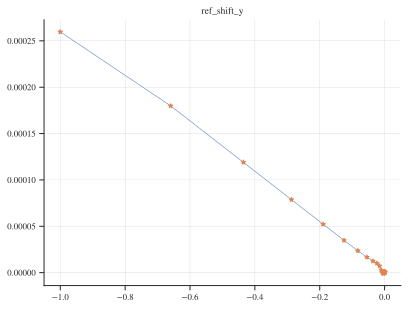

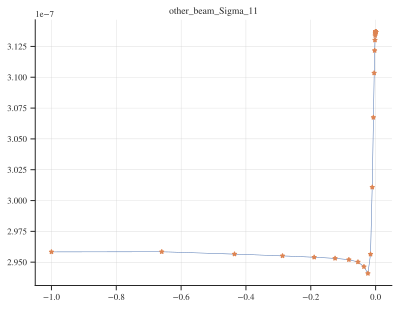

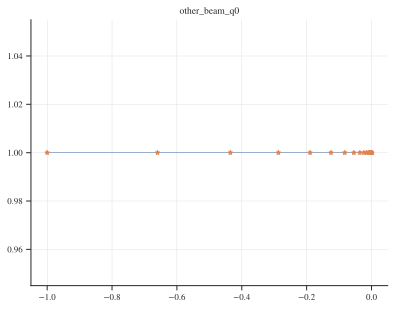

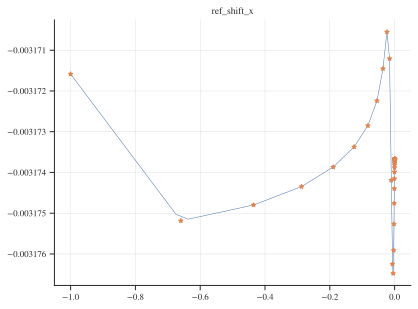

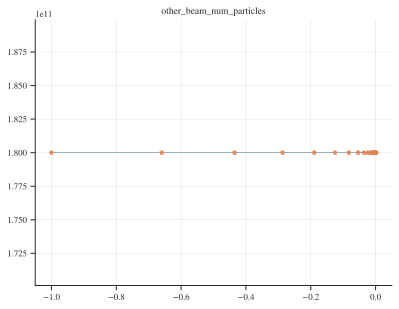

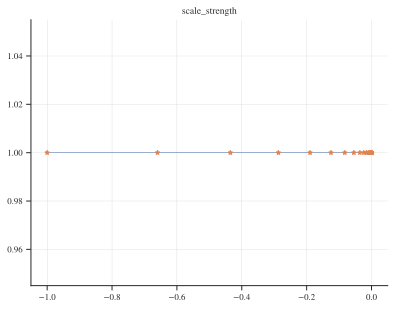

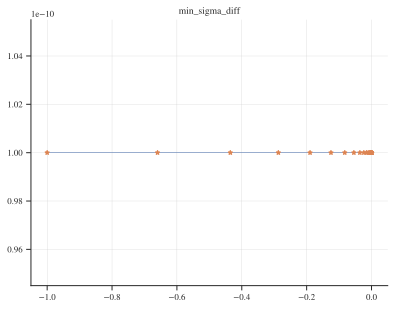

In [7]:
# Increase the sampling of l_xrange
array_xrange = -np.logspace(0, -10, 10*len(l_xrange), endpoint = True)
for attr in d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25']:

    fig, ax = plt.subplots()
    y_plot = np.interp(array_xrange, l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr])
    ax.plot(array_xrange, y_plot)
    ax.plot(l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr], '*')
    #ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.grid()
    plt.show()

## Implement interpolation in collider

In [8]:
def make_closure_interp(extended_xrange, extended_y):
    return lambda x: xd.FunctionPieceWiseLinear(x=extended_xrange, y=extended_y)(x)

extended_xrange = l_xrange + [-x for x in l_xrange[::-1]]
d_element_attr_regression = {"lhcb1": {}, "lhcb2": {}}
for beam in d_element_attr_regression:
    d_element_attr_regression[beam] = {}
    for element in d_element_attr_vals[beam]:
        d_element_attr_regression[beam][element] = {}
        for attr in d_element_attr_vals[beam][element]:
            extended_y = (
                d_element_attr_vals[beam][element][attr]
                + d_element_attr_vals[beam][element][attr][::-1]
            )   
            d_element_attr_regression[beam][element][attr] = make_closure_interp(extended_xrange, extended_y)

In [9]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_x"](-0.3)

0.05575904099907841

In [10]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_x"](-0.003)

0.05576154641686314

In [11]:
# Create knob for beam-beam in collider
for beam in d_element_attr_regression:
    for element in d_element_attr_regression[beam]:
        if "l1" or "r1" in element:
            sep = "on_sep1"
        elif "l5" or "r5" in element:
            sep = "on_sep5"
        else:
            continue
        for attr in d_element_attr_regression[beam][element]:

            collider[beam].functions[f"interp_{element}_{attr}"] = d_element_attr_regression[beam][element][attr]
            if isinstance(getattr(collider[beam][element], attr), list) or isinstance(
                getattr(collider[beam][element], attr), np.ndarray
            ):
                setattr(
                    collider[beam].element_refs[element],
                    attr[0],
                    collider[beam].functions[f"interp_{element}_{attr}"](collider.vars[sep]),
                )
            else:
                setattr(
                    collider[beam].element_refs[element],
                    attr,
                    collider[beam].functions[f"interp_{element}_{attr}"](collider.vars[sep]),
                )
                
collider.to_json("collider_test.json")

In [12]:
sep = 0.3
collider.vars['on_sep1'] = -sep
collider.vars['on_sep5'] = sep
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._get_value()
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._info()

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x._get_value()
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x = 0.05575904099907841

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x._expr
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x = f['interp_bb_lr.l5b1_25_other_beam_shift_x'](vars['on_sep1'])

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x._expr._get_dependencies()
   f['interp_bb_lr.l5b1_25_other_beam_shift_x'] = <function make_closure_interp.<locals>.<lambda> at 0x7f96cf6911b0>
   vars['on_sep1'] = -0.3

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x does not influence any target



In [13]:
collider.vars['on_sep1']._value

-0.3

In [14]:
sep = 0.3
collider.vars['on_sep1'] = -sep
collider.vars['on_sep5'] = sep
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._get_value()

0.05575904099907841

In [15]:
sep = 0.0003
collider.vars['on_sep1'] = -sep
collider.vars['on_sep5'] = sep
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._get_value()

0.055757456645281506

## Ensure that the piecewise linear interpolation in the collider is correct

starting other_beam_shift_x


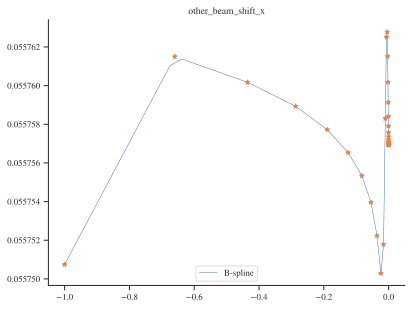

In [16]:
# Increase the sampling of l_xrange
array_xrange = -np.logspace(0, -10, 10*len(l_xrange), endpoint = True)

import time
for attr in d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25']:
    print("starting", attr)
    y_plot = []
    for sep in array_xrange:
        a = time.time()
        collider.vars['on_sep1'] = -sep
        collider.vars['on_sep5'] = sep
        y_plot.append(getattr(collider.lhcb1.element_refs["bb_lr.l5b1_25"], attr)._get_value())
        b = time.time()
        #print("Elapsed time:", b-a)

    fig, ax = plt.subplots()
    ax.plot(array_xrange, y_plot, label="B-spline")
    ax.plot(l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr], '*')
    ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.show()
    break

## Ensure that the dynamic kbob delivers the same results at xsuite reconfiguration

In [17]:
#collider.build_trackers()

In [18]:
def configure_beam_beam(collider, config_bb):
    collider.configure_beambeam_interactions(
        num_particles=config_bb["num_particles_per_bunch"],
        nemitt_x=config_bb["nemitt_x"],
        nemitt_y=config_bb["nemitt_y"],
    )

    # Configure filling scheme mask and bunch numbers
    if "mask_with_filling_pattern" in config_bb:
        # Initialize filling pattern with empty values
        filling_pattern_cw = None
        filling_pattern_acw = None

        # Initialize bunch numbers with empty values
        i_bunch_cw = None
        i_bunch_acw = None

        if "pattern_fname" in config_bb["mask_with_filling_pattern"]:
            # Fill values if possible
            if config_bb["mask_with_filling_pattern"]["pattern_fname"] is not None:
                fname = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/master_jobs/filling_scheme/25ns_2464b_2452_1842_1821_236bpi_12inj_hybrid_converted.json"  # config_bb["mask_with_filling_pattern"]["pattern_fname"]
                with open(fname, "r") as fid:
                    filling = json.load(fid)
                filling_pattern_cw = filling["beam1"]
                filling_pattern_acw = filling["beam2"]

                # Only track bunch number if a filling pattern has been provided
                if "i_bunch_b1" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_cw = 411
                if "i_bunch_b2" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_acw = 410

                # Note that a bunch number must be provided if a filling pattern is provided
                # Apply filling pattern
                collider.apply_filling_pattern(
                    filling_pattern_cw=filling_pattern_cw,
                    filling_pattern_acw=filling_pattern_acw,
                    i_bunch_cw=i_bunch_cw,
                    i_bunch_acw=i_bunch_acw,
                )

    return collider


# Read configuration for simulations
with open(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/gen_3/gen_4/gen_5_debug/config.yaml",
    "r",
) as fid:
    config = ryaml.load(fid)

config_bb = config["config_collider"]["config_beambeam"]
#collider = configure_beam_beam(collider, config_bb)

In [19]:
# Function to compute footprint
def return_footprint(collider, emittance, beam="lhcb1", n_turns=2000):
    fp_polar_xm = collider[beam].get_footprint(
        nemitt_x=emittance,
        nemitt_y=emittance,
        n_turns=n_turns,
        linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.05)],
        freeze_longitudinal=True,
    )

    qx = fp_polar_xm.qx
    qy = fp_polar_xm.qy

    return qx, qy



collider.vars['on_sep1'] = -0.3
collider.vars['on_sep5'] = 0.3
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()

# Reconfigure beam-beam
collider = configure_beam_beam(collider, config_bb)
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()

# Change knob
collider.vars['on_sep1'] = -0.00
collider.vars['on_sep5'] = 0.00
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()

# Reconfigure beam-beam
collider = configure_beam_beam(collider, config_bb)
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()


RuntimeError: `Line._context` con only be called after `Line.build_tracker`

In [ ]:
# Test dump
collider.to_json("collider_test.json")